In [170]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob

plt.rcParams['figure.figsize'] = (10.0, 8.0)

In [183]:
def get_df_for_metric(regex, metric_name):
    files = glob.glob(f"runs/{regex}")
    print(f"Found {len(files)} files for regex.")
    dfs = [pd.read_csv(file) for file in files]
    dfs = list(map(lambda x: x.loc[x['metric_name'] == metric_name][['episode', 'timestamp', 'value']], dfs))
    df = dfs[0]; i=1
    for df2 in dfs[1:]:
        df2['timestamp'] -= df2['timestamp'].iloc[0]
        df2.columns = [f"{column}_{i}" if column!="episode" else column for column in df2.columns]
        df = df.merge(df2, how="inner", on="episode")
        i+=1
    return df

In [188]:
def aggregate(data):
    data['mean_value'] = data[[col for col in data.columns if "value" in col]].mean(axis=1)
    data['std_value'] = data[[col for col in data.columns if "value" in col]].std(axis=1)

In [193]:
data = get_df_for_metric("*reinforce*Pendulum*", "total_reward")
aggregate(data)

Found 7 files for regex.


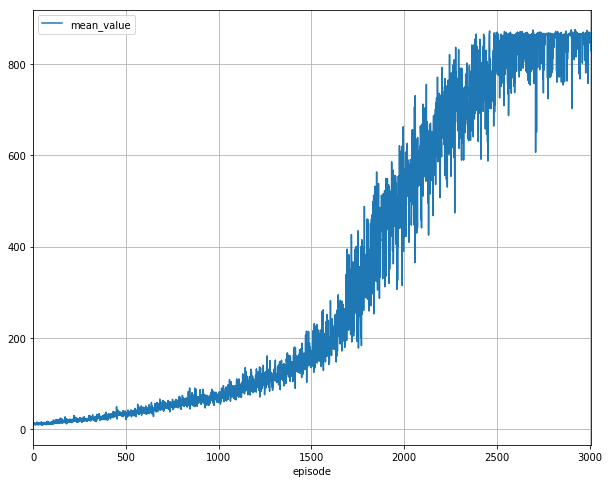

In [197]:
# sns.lineplot(y="mean_value", x="episode", data=data)
data.plot(y="mean_value", x="episode")
plt.grid()